## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [1]:
# Importing Appropriate Packages

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import sympy as sp
from plotnine import *

In [2]:
# Reading in Data

hd_df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
hd_df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
# Making sure Types for each variable are Correct
hd_df.dtypes

Name         object
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
restecg       int64
thalach       int64
diagnosis    object
dtype: object

In [4]:
# Specifying X, Y, and split
X = hd_df[["age", "chol"]]
y = hd_df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,y)


# CT
ct = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
  make_column_selector(dtype_include=object)), #selecting all columns that are categorical

  ("standardize",
  StandardScaler(),
  make_column_selector(dtype_include=np.number)) #standardizing numerical variables
  ], remainder = "passthrough" #keep everything else
)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [5]:
# Creating Pipeline
log_pipeline = Pipeline(
  [("log_regression", LogisticRegression())])

# Fitting Pipeline
log_fitted = log_pipeline.fit(X, y)

# Obtaining Coefficients
log_fitted.named_steps['log_regression'].coef_

array([[0.04686331, 0.00180124]])

In [6]:
# Obtaining Intercept
intercept_log = log_fitted.named_steps['log_regression'].intercept_[0].round(4)
print("Intercept:", intercept_log)

# Obtaining Coefficient for Age
age_coef_log = log_fitted.named_steps['log_regression'].coef_[0][0].round(4)
print("Age Coefficient:", age_coef_log)

# Obtaining Coefficient for Chol
chol_coef_log = log_fitted.named_steps['log_regression'].coef_[0][1].round(4)
print("Cholesterol Coefficient:", chol_coef_log)

Intercept: -3.2401
Age Coefficient: 0.0469
Cholesterol Coefficient: 0.0018


In [7]:
# Predicting Cholesterol Level for 55 year old to Predict Heart Disease (Heart Disease = 1)

# Model is Heart Disease = intercept + age_coef + chol_coef
# Using numbers: 1 = -0.302 + 0.564*age + 0.068*chol
# Plugging in 55 and solving for chol: (3.2401 - 0.0469*55)/0.0018

chol_pred_log = round((-intercept_log - (age_coef_log*55))/chol_coef_log, 2)
print("Predicting Cholesterol Level for 55 year old to Predict Heart Disease:", chol_pred_log)

Predicting Cholesterol Level for 55 year old to Predict Heart Disease: 367.0


In [8]:
# Predicting how high for the doctors to estimate a 90% chance that heart disease is present?

# Finding Corresponding Logit Value for 90%
logit = np.log(0.9/(1-0.9))

# 0.0469 * 55 + 0.0018*chol + -3.2401 =

chol_log = round((logit - intercept_log - (age_coef_log * 55))/chol_coef_log, 2)
print("For the doctors to estimate a 90% chance that heart disease is present, the following cholesterol amount is predicted:", chol_log)

For the doctors to estimate a 90% chance that heart disease is present, the following cholesterol amount is predicted: 1587.68


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [9]:
# LDA Model
lda_pipeline = Pipeline(
  [("LDA", LinearDiscriminantAnalysis())])

lda_fitted = lda_pipeline.fit(X, y)

# Obtaining Intercept
intercept_lda = lda_fitted.named_steps['LDA'].intercept_[0].round(4)
print("Intercept:", intercept_lda)

# Obtaining Coefficient for Age
age_coef_lda = lda_fitted.named_steps['LDA'].coef_[0][0].round(4)
print("Age Coefficient:", age_coef_lda)

# Obtaining Coefficient for Chol
chol_coef_lda = lda_fitted.named_steps['LDA'].coef_[0][1].round(4)
print("Cholesterol Coefficient:", chol_coef_lda)

Intercept: -3.2197
Age Coefficient: 0.0466
Cholesterol Coefficient: 0.0018


In [10]:
# Predicting how high for the doctors to estimate that heart disease is present for 55 year old?

# 0.0469 * 55 + 0.0018*chol + -3.2401 =

chol_lda = round((-intercept_lda - (age_coef_lda * 55))/chol_coef_lda, 2)
print("For the doctors to estimate that heart disease is present, the following cholesterol amount is predicted:", chol_lda)

For the doctors to estimate that heart disease is present, the following cholesterol amount is predicted: 364.83


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [11]:
# SVC Model
svc_pipeline = Pipeline(
  [("SVC", SVC(kernel = "linear"))])

svc_fitted = svc_pipeline.fit(X, y)

# Obtaining Intercept
intercept_svc = svc_fitted.named_steps['SVC'].intercept_[0].round(4)
print("Intercept:", intercept_svc)

# Obtaining Coefficient for Age
age_coef_svc = svc_fitted.named_steps['SVC'].coef_[0][0].round(4)
print("Age Coefficient:", age_coef_svc)

# Obtaining Coefficient for Chol
chol_coef_svc = svc_fitted.named_steps['SVC'].coef_[0][1].round(4)
print("Cholesterol Coefficient:", chol_coef_svc)

Intercept: -4.686
Age Coefficient: 0.0644
Cholesterol Coefficient: 0.0037


In [12]:
# Predicting how high for the doctors to estimate that heart disease is present for 55 year old?

# 0.0469 * 55 + 0.0018*chol + -3.2401 =

chol_svc = round((-intercept_svc - (age_coef_svc * 55))/chol_coef_svc, 2)
print("For the doctors to estimate that heart disease is present, the following cholesterol amount is predicted:", chol_svc)

For the doctors to estimate that heart disease is present, the following cholesterol amount is predicted: 309.19


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [13]:
# Creating Slopes and Intercepts for Each Model

slope_log = -age_coef_log / chol_coef_log
intercept_log = -intercept_log / chol_coef_log

slope_lda = -age_coef_lda / chol_coef_lda
intercept_lda = -intercept_lda / chol_coef_lda

slope_svc = -age_coef_svc / chol_coef_svc
intercept_svc = -intercept_svc / chol_coef_svc

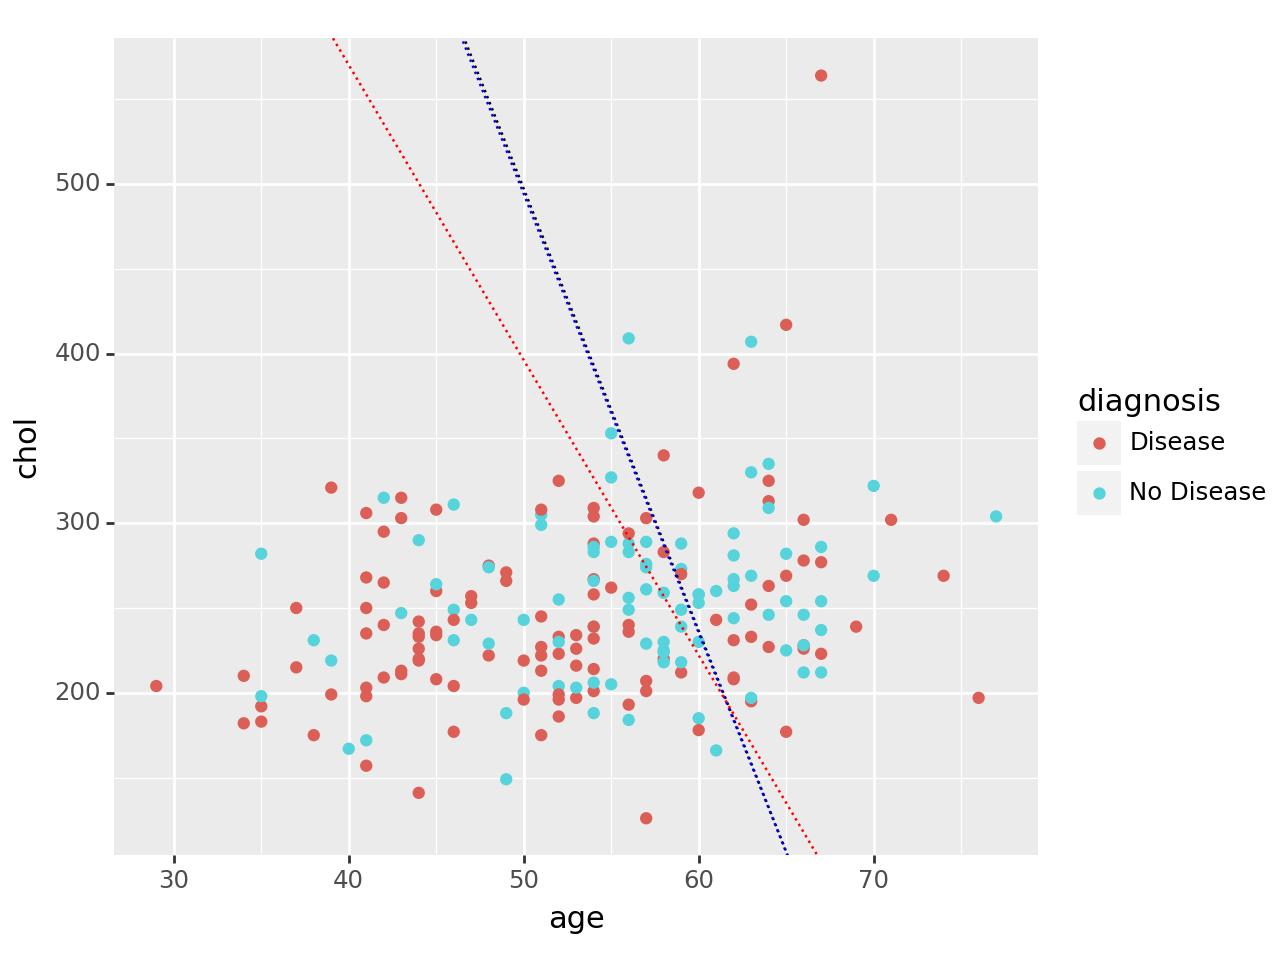

<Figure Size: (640 x 480)>

In [14]:
# Creating Plot
(ggplot(hd_df, aes(x = "age",
                   y = "chol",
                   color = "diagnosis")) # Coloring by Disease Outcome
+ geom_point() # Scatterplot)
+ geom_abline(intercept = intercept_log, slope = slope_log, linetype = "dotted", color = "black")
+ geom_abline(intercept = intercept_lda, slope = slope_lda, linetype = "dotted", color = "blue")
+ geom_abline(intercept = intercept_svc, slope = slope_svc, linetype = "dotted", color = "red"))

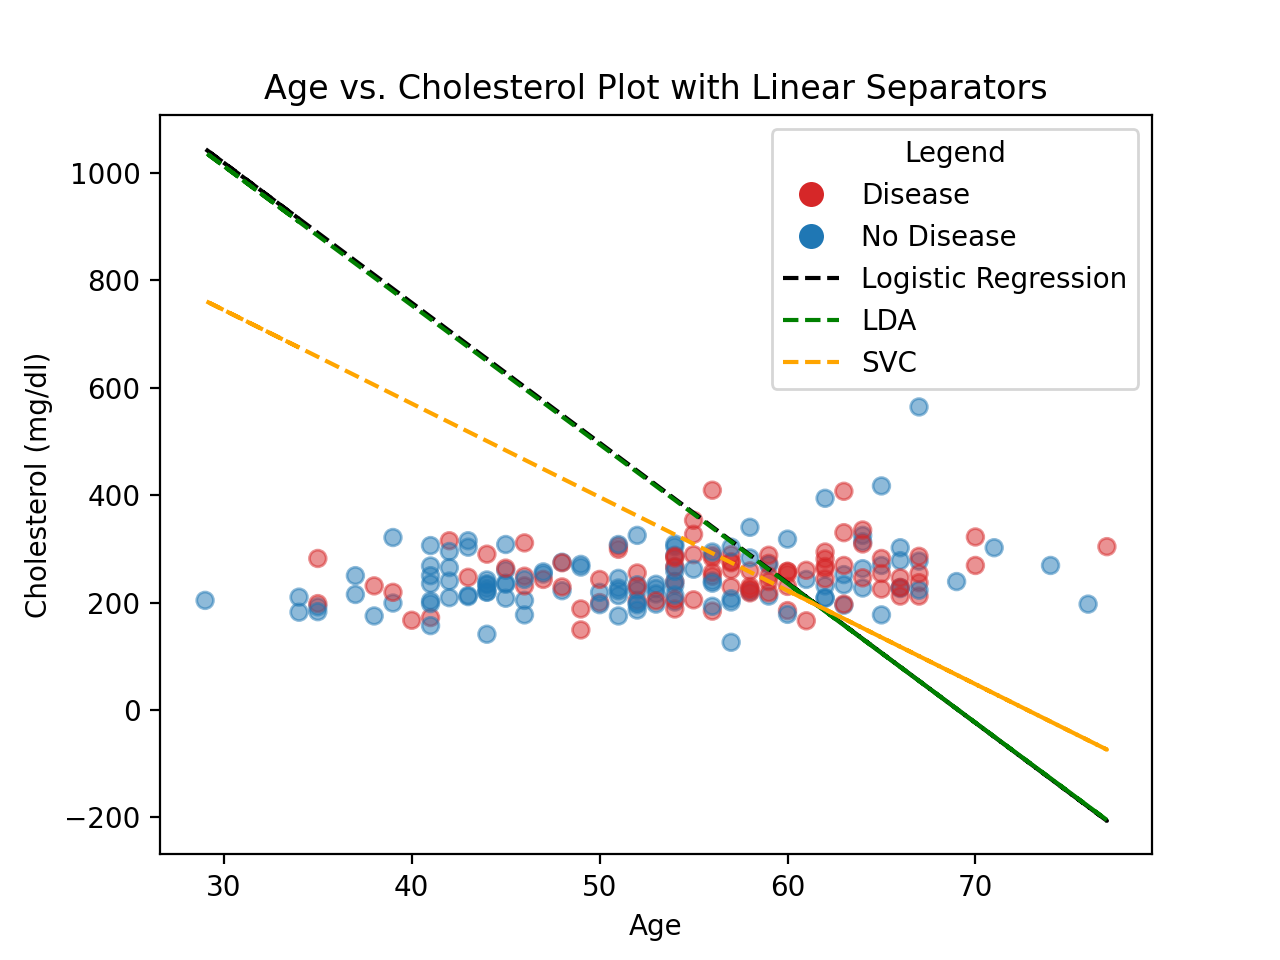

In [43]:
# Using Matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assign colors based on unique labels in the 'diagnosis' column
unique_labels = hd_df['diagnosis'].unique()
colors = ['tab:red', 'tab:blue']  # Define colors for unique labels

legend_colors = dict(zip(unique_labels, colors))

# Plot data points with appropriate colors
plt.scatter(hd_df['age'], hd_df['chol'], c=[legend_colors[label] for label in hd_df['diagnosis']], label='Diagnosis',alpha=0.5)

# Plot lines representing methods with matching colors
methods_data = {
    'Logistic Regression': (slope_log, intercept_log, 'black'),  # Assigning color explicitly
    'LDA': (slope_lda, intercept_lda, 'green'),  # Assigning color explicitly
    'SVC': (slope_svc, intercept_svc, 'orange')  # Assigning color explicitly
}

for method, (slope, intercept, color) in methods_data.items():
    x_values = hd_df['age']
    y_values = [slope * age + intercept for age in x_values]
    plt.plot(x_values, y_values, linestyle='--', label=method, color=color)  # Use the assigned color

# Creating legends
# Create a legend for 'diagnosis'
legend_colors = {'Disease': 'tab:red', 'No Disease': 'tab:blue'}
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in legend_colors.items()]

# Create a legend for lines representing methods
legend_methods = {'Logistic Regression': 'black', 'LDA': 'green', 'SVC': 'orange'}
legend_elements_methods = [Line2D([0], [0], linestyle='--', color=color, label=label) for label, color in legend_methods.items()]

plt.legend(handles=legend_elements + legend_elements_methods, title='Legend')
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dl)")
plt.title("Age vs. Cholesterol Plot with Linear Separators")
plt.show()